In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from config import *
from src.prob_model_evaluator import ModelEvaluator
from src.models.ngb import NGB
from src.models.gpr import GPr

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.set(style="whitegrid", font_scale=1.5)
plt.rcParams['lines.markersize'] = 7

# Mordred

## NGBoost

In [3]:
model = NGB()
feature_set = ["mordred"]
neval = ModelEvaluator(data_dir, name, feature_set, model, scaler_x=None, scaler_y=None)

m, a, b = neval.evaluate_hold_out(n_repeats=10)


Masking 0 feature dims for ['mordred']
[iter 0] loss=1.3718 val_loss=1.8567 scale=1.0000 norm=0.9626
[iter 100] loss=0.9019 val_loss=1.5470 scale=2.0000 norm=1.2357
[iter 200] loss=0.3950 val_loss=1.8486 scale=2.0000 norm=0.9868
== Early stopping achieved.
== Best iteration / VAL111 (val_loss=1.5417)
[iter 0] loss=1.4401 val_loss=1.2895 scale=1.0000 norm=1.0189
[iter 100] loss=1.0356 val_loss=1.2174 scale=2.0000 norm=1.3546
== Early stopping achieved.
== Best iteration / VAL98 (val_loss=1.2159)
[iter 0] loss=1.3541 val_loss=2.0522 scale=1.0000 norm=0.9483
[iter 100] loss=0.8718 val_loss=1.4771 scale=2.0000 norm=1.2066
[iter 200] loss=0.3638 val_loss=1.4034 scale=2.0000 norm=0.9825
== Early stopping achieved.
== Best iteration / VAL175 (val_loss=1.3773)
[iter 0] loss=1.4333 val_loss=1.3048 scale=1.0000 norm=1.0125
[iter 100] loss=1.0061 val_loss=1.1706 scale=2.0000 norm=1.3258
[iter 200] loss=0.5029 val_loss=1.0331 scale=2.0000 norm=1.0084
[iter 300] loss=0.0075 val_loss=1.3824 scale=2.

In [4]:
m

,R^2,MAE,MMC,AMC
mean,0.430688,0.563562,0.238647,0.129706
50%,0.467636,0.588775,0.185990,0.096216
std,0.260749,0.124636,0.133630,0.089584


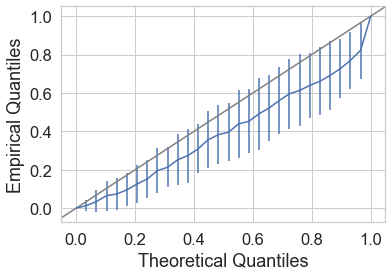

In [5]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')

## Gaussian Process Regression

In [2]:
model = GPr(kernel='rbf')
feature_set = ["mordred"]
neval = ModelEvaluator(data_dir, name, feature_set, model, scaler_x="quantile", scaler_y="standard")

m, a, b = neval.evaluate_hold_out(n_repeats=10)

Masking 0 feature dims for ['mordred']


ValueError: Input contains NaN.

In [7]:
m

,R^2,MAE,MMC,AMC
mean,-0.032418,0.917391,8.888889e-01,0.453704
50%,-0.020070,0.938375,8.888889e-01,0.453704
std,0.039444,0.080920,2.340556e-16,0.000000


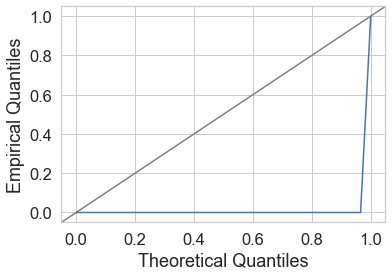

In [8]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')

# Morgan

## NGB

In [9]:
model = NGB()
feature_set = ["morgan"]
neval = ModelEvaluator(data_dir, name, feature_set, model)

m, a, b = neval.evaluate_hold_out(n_repeats=10)


Masking 0 feature dims for ['morgan']
[iter 0] loss=4.7651 val_loss=5.2526 scale=1.0000 norm=25.0830
[iter 100] loss=4.4396 val_loss=5.0319 scale=1.0000 norm=17.8503
[iter 200] loss=4.1806 val_loss=5.0619 scale=1.0000 norm=12.3923
== Early stopping achieved.
== Best iteration / VAL132 (val_loss=5.0172)
[iter 0] loss=4.8676 val_loss=4.7189 scale=1.0000 norm=29.2918
[iter 100] loss=4.5197 val_loss=4.7626 scale=1.0000 norm=18.8034
== Early stopping achieved.
== Best iteration / VAL8 (val_loss=4.7173)
[iter 0] loss=4.7498 val_loss=5.4531 scale=1.0000 norm=25.0389
[iter 100] loss=4.3775 val_loss=5.0193 scale=2.0000 norm=32.5419
[iter 200] loss=4.0070 val_loss=4.8808 scale=2.0000 norm=19.1444
[iter 300] loss=3.6307 val_loss=5.1985 scale=2.0000 norm=12.7191
== Early stopping achieved.
== Best iteration / VAL201 (val_loss=4.8799)
[iter 0] loss=4.7951 val_loss=4.6651 scale=1.0000 norm=26.7381
[iter 100] loss=4.4832 val_loss=4.4843 scale=1.0000 norm=18.5630
[iter 200] loss=4.1803 val_loss=4.2983

In [10]:
m

,R^2,MAE,MMC,AMC
mean,0.392037,18.048948,0.250725,0.121717
50%,0.401323,18.248594,0.236715,0.108494
std,0.155822,2.781911,0.083905,0.059882


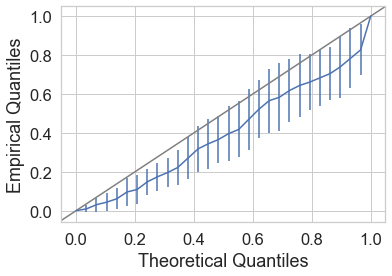

In [11]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')

## Gaussian Process Regression

In [12]:
model = GPr(kernel='Tanimoto')
feature_set = ["morgan"]
neval = ModelEvaluator(data_dir, name, feature_set, model)

m, a, b = neval.evaluate_hold_out(n_repeats=10)

Masking 0 feature dims for ['morgan']


In [13]:
m

,R^2,MAE,MMC,AMC
mean,0.500157,16.624872,0.149275,0.074365
50%,0.556860,16.057565,0.140097,0.059894
std,0.158386,2.635544,0.064148,0.043625


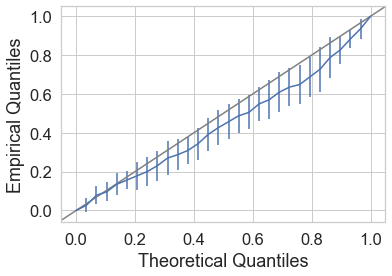

In [14]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')

# Morgan + Mordred

## NGBoost

In [15]:
model = NGB()
feature_set = ["mordred", "morgan"]
neval = ModelEvaluator(data_dir, name, feature_set, model)

m, a, b = neval.evaluate_hold_out(n_repeats=10)


Masking 0 feature dims for ['mordred', 'morgan']
[iter 0] loss=4.7651 val_loss=5.2499 scale=1.0000 norm=25.0830
[iter 100] loss=4.2952 val_loss=4.9292 scale=2.0000 norm=27.5510
[iter 200] loss=3.7882 val_loss=5.2290 scale=2.0000 norm=11.2453
== Early stopping achieved.
== Best iteration / VAL107 (val_loss=4.9263)
[iter 0] loss=4.8676 val_loss=4.7170 scale=1.0000 norm=29.2918
[iter 100] loss=4.4631 val_loss=4.6441 scale=2.0000 norm=34.3984
[iter 200] loss=3.9403 val_loss=4.9664 scale=2.0000 norm=13.2399
== Early stopping achieved.
== Best iteration / VAL104 (val_loss=4.6429)
[iter 0] loss=4.7498 val_loss=5.4499 scale=1.0000 norm=25.0389
[iter 100] loss=4.2675 val_loss=4.8584 scale=2.0000 norm=26.8516
[iter 200] loss=3.7583 val_loss=4.7921 scale=2.0000 norm=10.5939
== Early stopping achieved.
== Best iteration / VAL171 (val_loss=4.7462)
[iter 0] loss=4.7951 val_loss=4.6666 scale=1.0000 norm=26.7381
[iter 100] loss=4.3679 val_loss=4.5314 scale=2.0000 norm=30.2726
[iter 200] loss=3.8647 va

In [18]:
m

,R^2,MAE,MMC,AMC
mean,0.430132,17.166161,0.241063,0.129871
50%,0.470675,18.049741,0.198068,0.096753
std,0.257112,3.576342,0.128914,0.085378


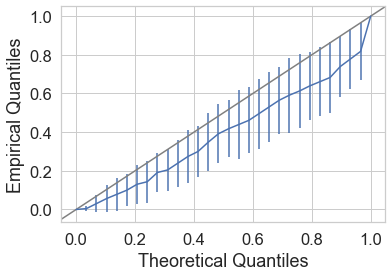

In [19]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')